In [16]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [5]:
# 경로 설정
data_dir = '/data/ephemeral/home/dataset'
train_json_path = os.path.join(data_dir, 'train.json')

In [6]:
# train.json 파일 로드
with open(train_json_path, 'r') as f:
    train_data = json.load(f)

In [7]:
# COCO format 데이터 구조 확인
images = train_data['images']
annotations = train_data['annotations']
categories = train_data['categories']

In [8]:
# 이미지 및 어노테이션 개수 출력
print(f"Total images: {len(images)}")
print(f"Total annotations: {len(annotations)}")

Total images: 4883
Total annotations: 23144


In [9]:
# 클래스 정보 확인
category_dict = {category['id']: category['name'] for category in categories}
print(f"Categories: {category_dict}")

Categories: {0: 'General trash', 1: 'Paper', 2: 'Paper pack', 3: 'Metal', 4: 'Glass', 5: 'Plastic', 6: 'Styrofoam', 7: 'Plastic bag', 8: 'Battery', 9: 'Clothing'}


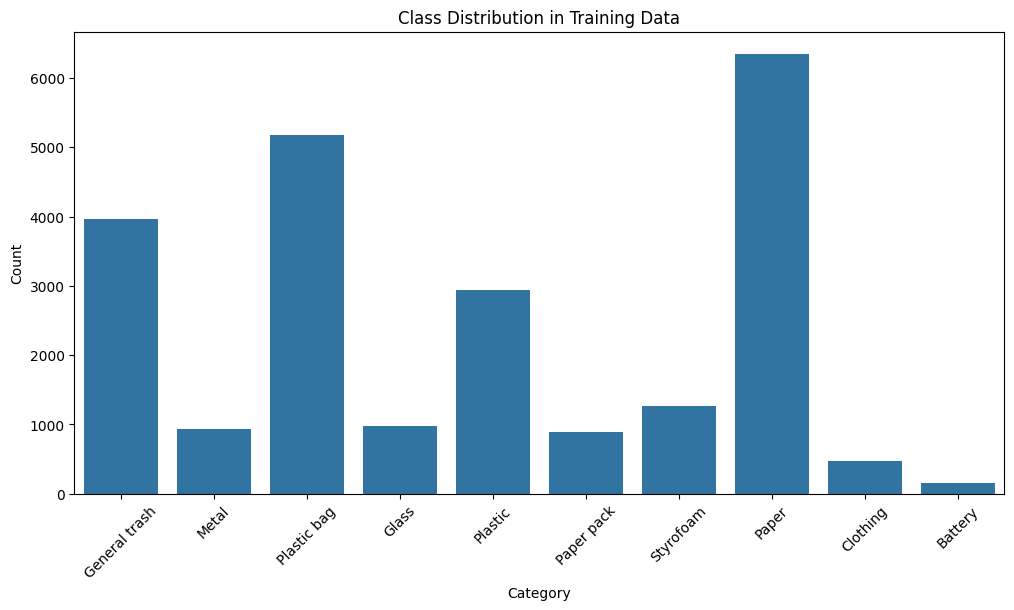

In [10]:
# 어노테이션의 클래스 분포 시각화
category_counts = Counter([annotation['category_id'] for annotation in annotations])
category_names = [category_dict[cat_id] for cat_id in category_counts.keys()]

plt.figure(figsize=(12, 6))
sns.barplot(x=category_names, y=list(category_counts.values()))
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution in Training Data')
plt.show()

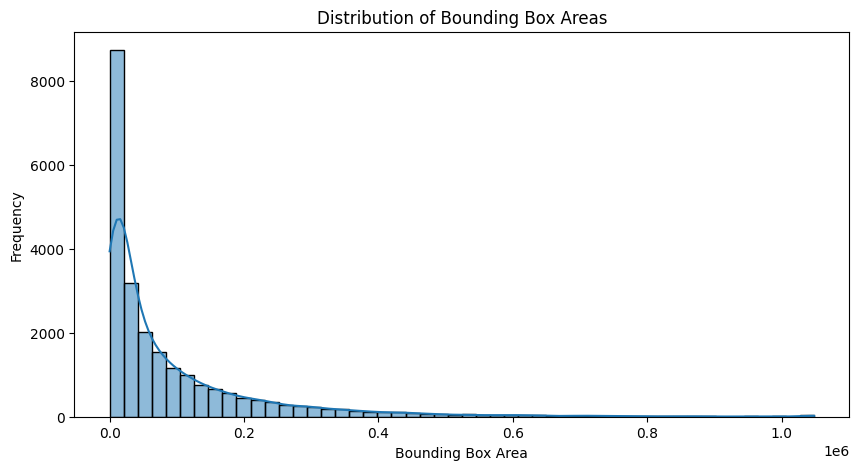

In [11]:
# 바운딩 박스 크기 분석
bbox_areas = [annotation['area'] for annotation in annotations]

plt.figure(figsize=(10, 5))
sns.histplot(bbox_areas, bins=50, kde=True)
plt.xlabel('Bounding Box Area')
plt.ylabel('Frequency')
plt.title('Distribution of Bounding Box Areas')
plt.show()

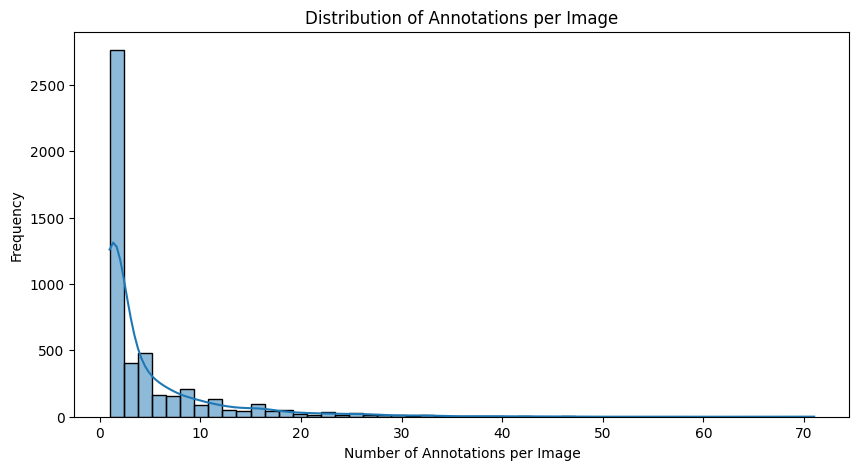

In [12]:
# 이미지당 어노테이션 개수 분석
image_annotation_counts = Counter([annotation['image_id'] for annotation in annotations])

plt.figure(figsize=(10, 5))
sns.histplot(list(image_annotation_counts.values()), bins=50, kde=True)
plt.xlabel('Number of Annotations per Image')
plt.ylabel('Frequency')
plt.title('Distribution of Annotations per Image')
plt.show()

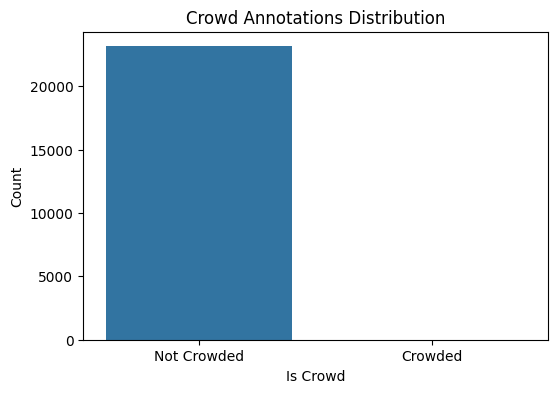

In [14]:
# is_crowd 분포 확인
is_crowd_counts = Counter([annotation.get('is_crowd', 0) for annotation in annotations])
plt.figure(figsize=(6, 4))
sns.barplot(x=['Not Crowded', 'Crowded'], y=[is_crowd_counts[0], is_crowd_counts[1]])
plt.xlabel('Is Crowd')
plt.ylabel('Count')
plt.title('Crowd Annotations Distribution')
plt.show()

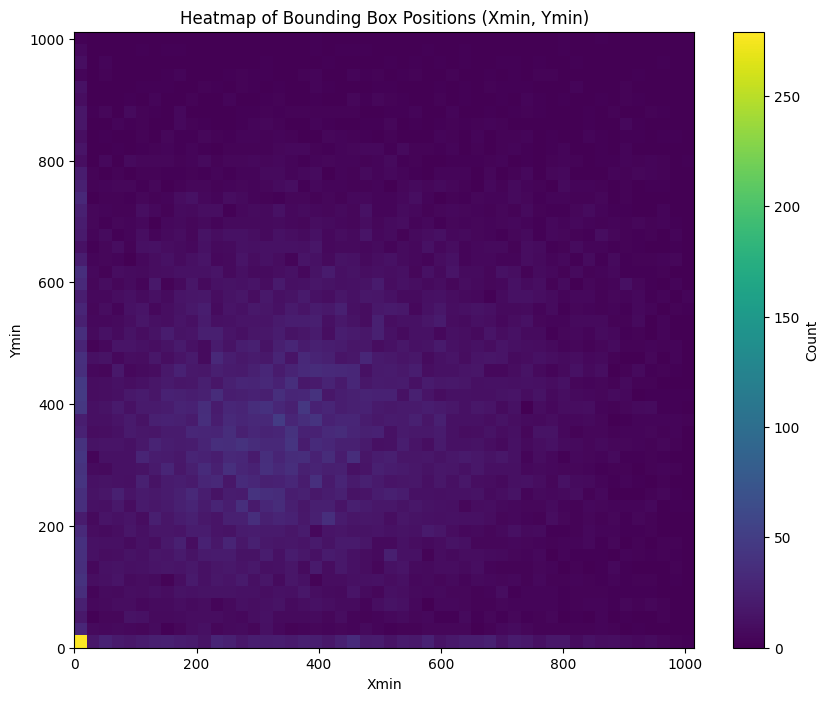

In [18]:
# Bounding Box 위치 분포 시각화
xmin_values = [annotation['bbox'][0] for annotation in annotations]
ymin_values = [annotation['bbox'][1] for annotation in annotations]

plt.figure(figsize=(10, 8))
plt.hist2d(xmin_values, ymin_values, bins=(50, 50), cmap='viridis')
plt.xlabel('Xmin')
plt.ylabel('Ymin')
plt.title('Heatmap of Bounding Box Positions (Xmin, Ymin)')
plt.colorbar(label='Count')
plt.show()

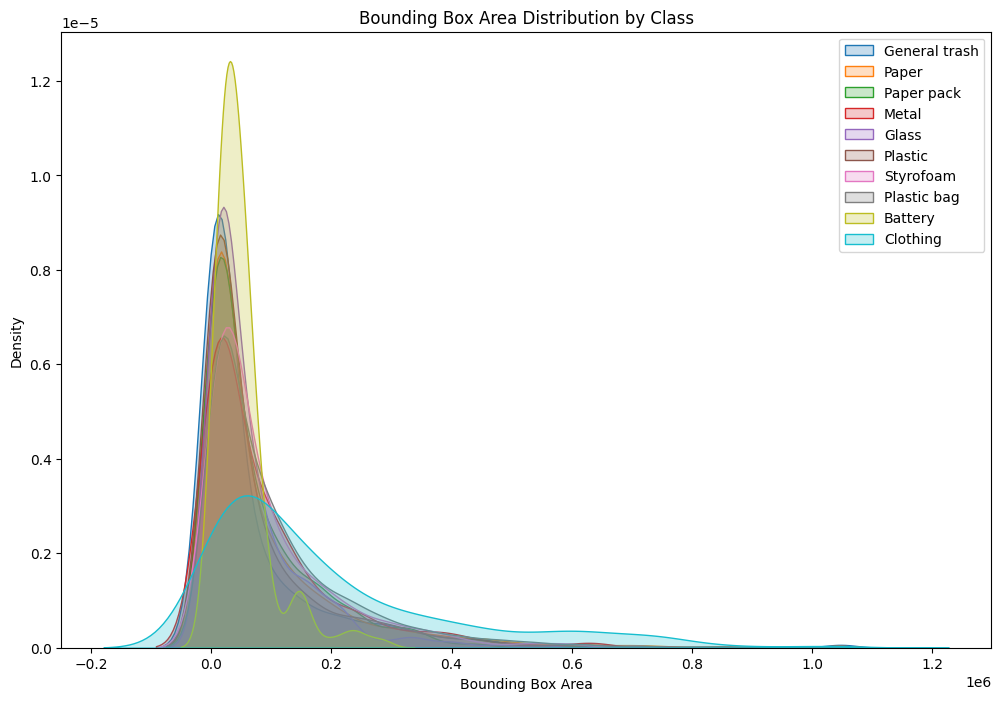

In [19]:
# 클래스별 Bounding Box 크기 분석
plt.figure(figsize=(12, 8))
for cat_id, cat_name in category_dict.items():
    cat_bbox_areas = [annotation['area'] for annotation in annotations if annotation['category_id'] == cat_id]
    sns.kdeplot(cat_bbox_areas, label=cat_name, fill=True)

plt.xlabel('Bounding Box Area')
plt.ylabel('Density')
plt.title('Bounding Box Area Distribution by Class')
plt.legend()
plt.show()

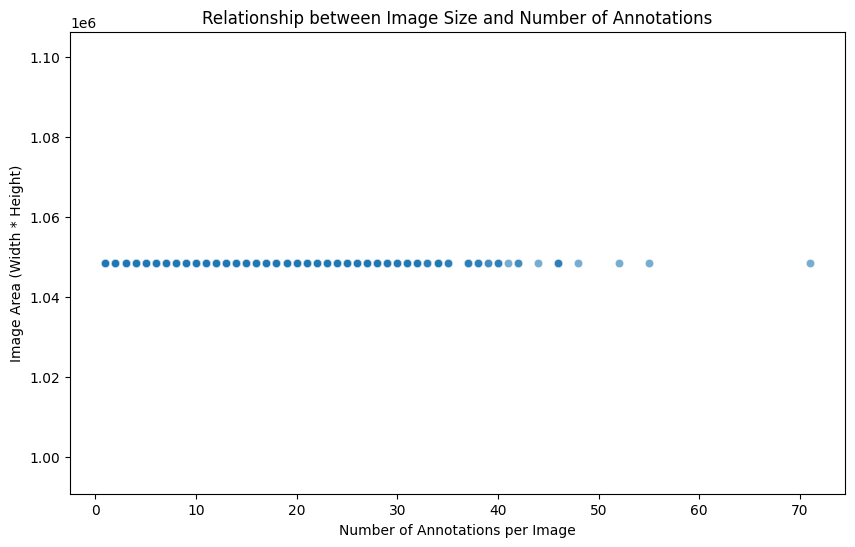

In [20]:
# 이미지 크기와 어노테이션 개수 관계 분석
image_ids = [image['id'] for image in images]
annotations_per_image = [image_annotation_counts[image_id] for image_id in image_ids]
image_widths = [image['width'] for image in images]
image_heights = [image['height'] for image in images]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=annotations_per_image, y=np.array(image_widths) * np.array(image_heights), alpha=0.6)
plt.xlabel('Number of Annotations per Image')
plt.ylabel('Image Area (Width * Height)')
plt.title('Relationship between Image Size and Number of Annotations')
plt.show()

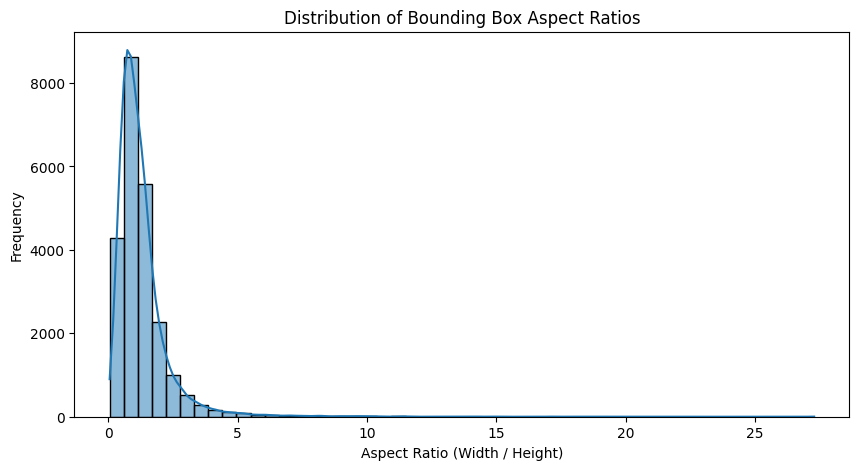

In [21]:
# 바운딩 박스의 가로, 세로 비율 분석
bbox_widths = [annotation['bbox'][2] for annotation in annotations]
bbox_heights = [annotation['bbox'][3] for annotation in annotations]
aspect_ratios = [width / height if height > 0 else 0 for width, height in zip(bbox_widths, bbox_heights)]

plt.figure(figsize=(10, 5))
sns.histplot(aspect_ratios, bins=50, kde=True)
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Frequency')
plt.title('Distribution of Bounding Box Aspect Ratios')
plt.show()

/tmp/ipykernel_443113/238162296.py:14: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


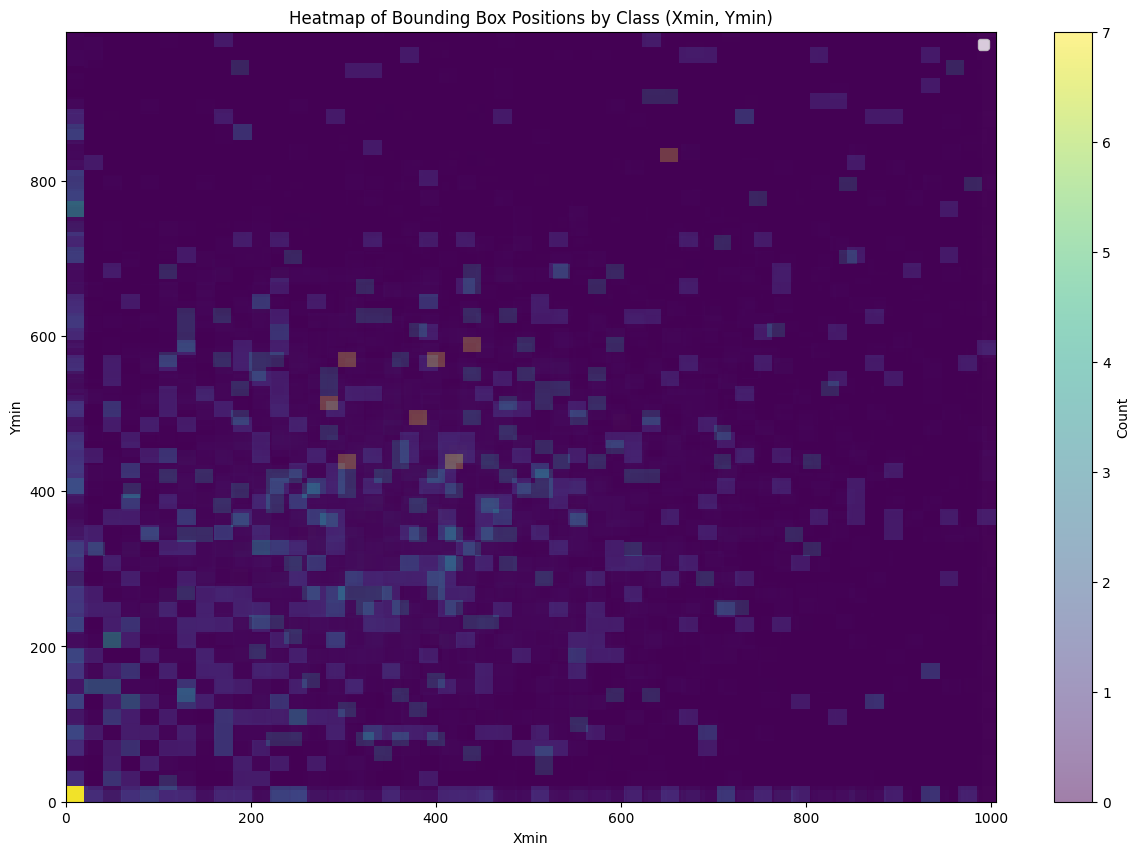

In [22]:
# 클래스별 바운딩 박스 위치 분포 분석
plt.figure(figsize=(15, 10))
for cat_id, cat_name in category_dict.items():
    cat_annotations = [annotation for annotation in annotations if annotation['category_id'] == cat_id]
    cat_xmin = [annotation['bbox'][0] for annotation in cat_annotations]
    cat_ymin = [annotation['bbox'][1] for annotation in cat_annotations]
    
    plt.hist2d(cat_xmin, cat_ymin, bins=(50, 50), cmap='viridis', alpha=0.5, label=cat_name)

plt.xlabel('Xmin')
plt.ylabel('Ymin')
plt.title('Heatmap of Bounding Box Positions by Class (Xmin, Ymin)')
plt.colorbar(label='Count')
plt.legend()
plt.show()

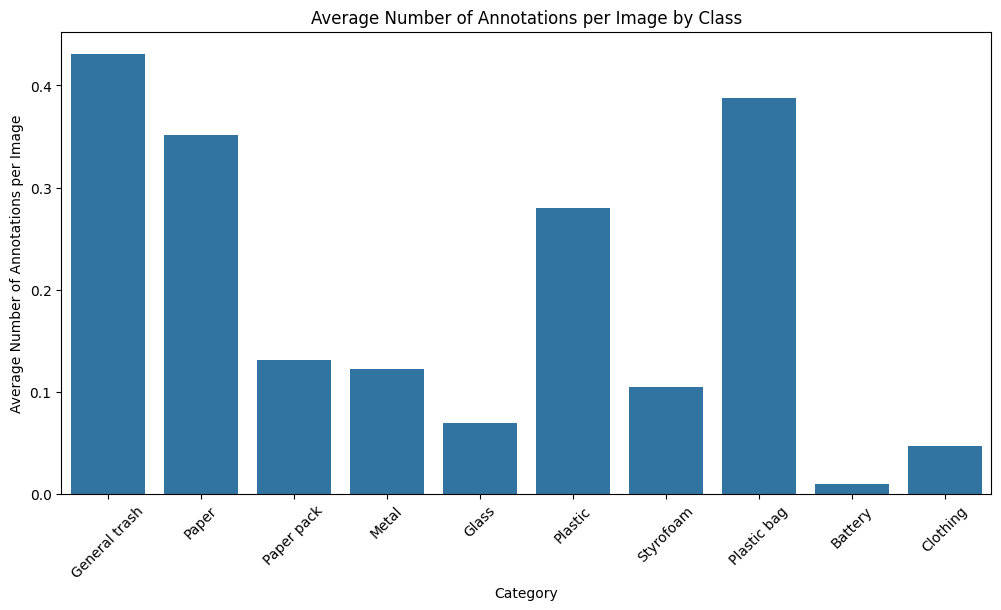

In [23]:
# 클래스별 이미지당 평균 어노테이션 개수 분석
class_annotation_counts = {cat_id: [] for cat_id in category_dict.keys()}

for annotation in annotations:
    class_annotation_counts[annotation['category_id']].append(annotation['image_id'])

average_annotations_per_image = {cat_name: len(set(image_ids)) / len(images) for cat_id, image_ids in class_annotation_counts.items() for cat_name in [category_dict[cat_id]]}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(average_annotations_per_image.keys()), y=list(average_annotations_per_image.values()))
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Number of Annotations per Image')
plt.title('Average Number of Annotations per Image by Class')
plt.show()

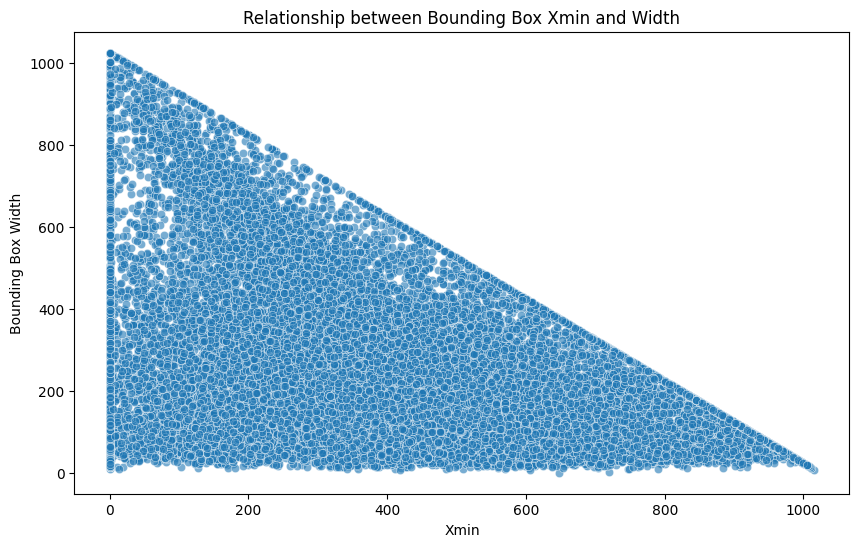

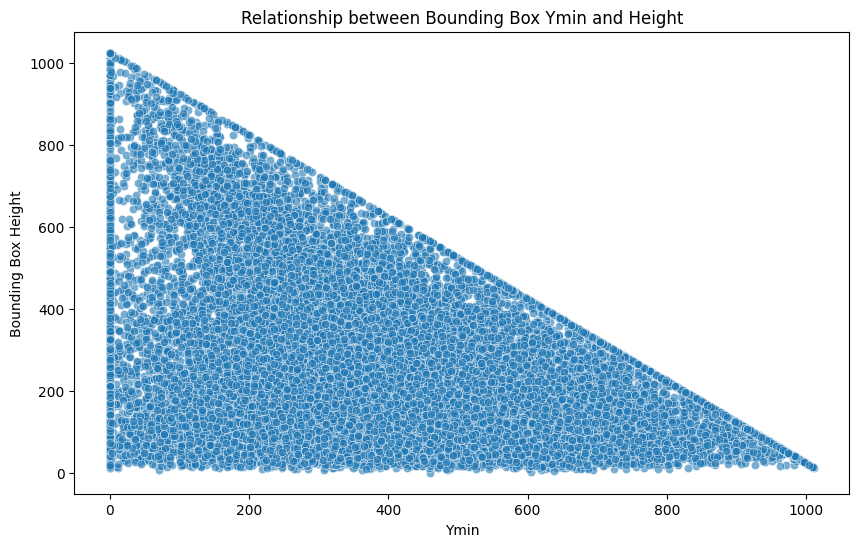

In [24]:
# 바운딩 박스 위치와 크기의 상관관계 분석
bbox_widths = [annotation['bbox'][2] for annotation in annotations]
bbox_heights = [annotation['bbox'][3] for annotation in annotations]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=xmin_values, y=bbox_widths, alpha=0.6)
plt.xlabel('Xmin')
plt.ylabel('Bounding Box Width')
plt.title('Relationship between Bounding Box Xmin and Width')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ymin_values, y=bbox_heights, alpha=0.6)
plt.xlabel('Ymin')
plt.ylabel('Bounding Box Height')
plt.title('Relationship between Bounding Box Ymin and Height')
plt.show()

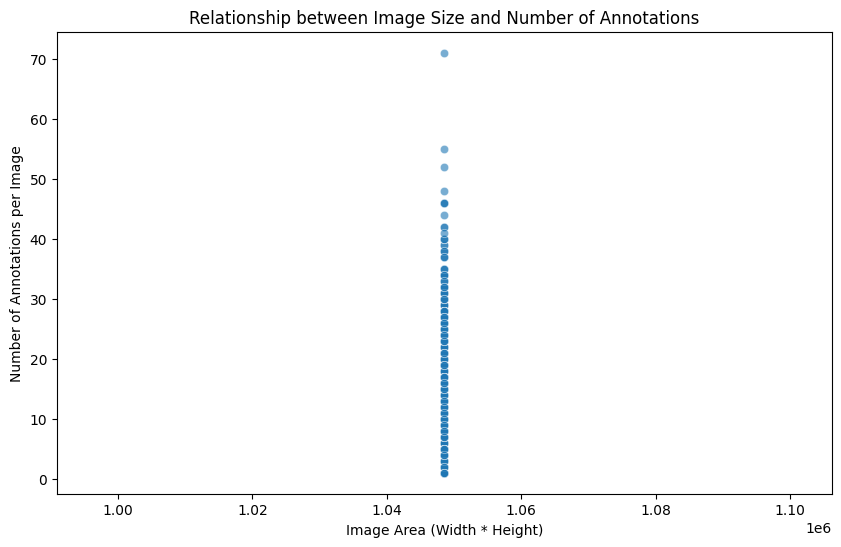

In [25]:
# 이미지 크기와 객체 개수 간 관계 분석
image_areas = [image['width'] * image['height'] for image in images]
annotations_per_image = [image_annotation_counts[image['id']] for image in images]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=image_areas, y=annotations_per_image, alpha=0.6)
plt.xlabel('Image Area (Width * Height)')
plt.ylabel('Number of Annotations per Image')
plt.title('Relationship between Image Size and Number of Annotations')
plt.show()

In [26]:
# 클래스별 객체 간 거리 분석
from scipy.spatial.distance import pdist, squareform

for cat_id, cat_name in category_dict.items():
    cat_annotations = [annotation for annotation in annotations if annotation['category_id'] == cat_id]
    if len(cat_annotations) > 1:
        cat_centers = [(ann['bbox'][0] + ann['bbox'][2] / 2, ann['bbox'][1] + ann['bbox'][3] / 2) for ann in cat_annotations]
        distances = pdist(cat_centers)
        avg_distance = np.mean(distances)
        print(f"Average distance between {cat_name} objects: {avg_distance:.2f}")


Average distance between General trash objects: 389.05
Average distance between Paper objects: 368.80
Average distance between Paper pack objects: 288.65
Average distance between Metal objects: 302.95
Average distance between Glass objects: 330.75
Average distance between Plastic objects: 366.65
Average distance between Styrofoam objects: 370.17
Average distance between Plastic bag objects: 387.39
Average distance between Battery objects: 321.76
Average distance between Clothing objects: 371.44


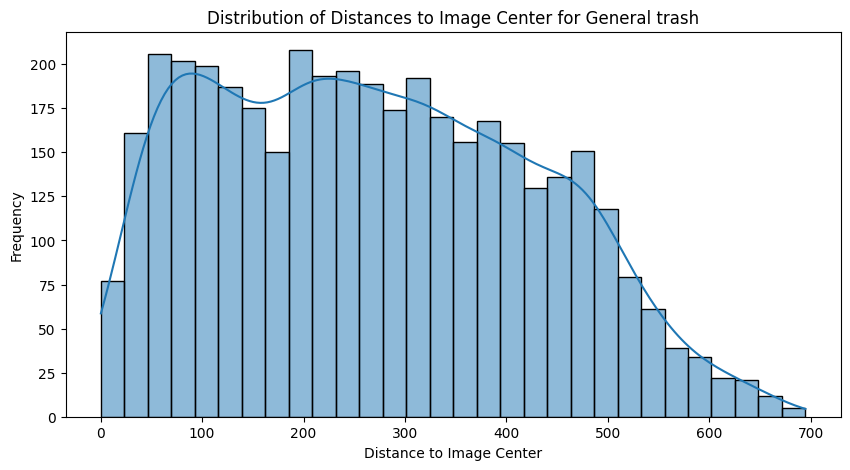

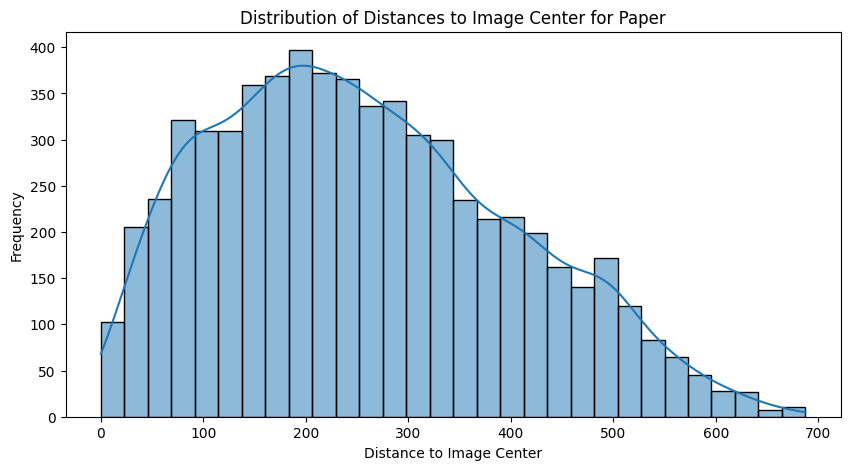

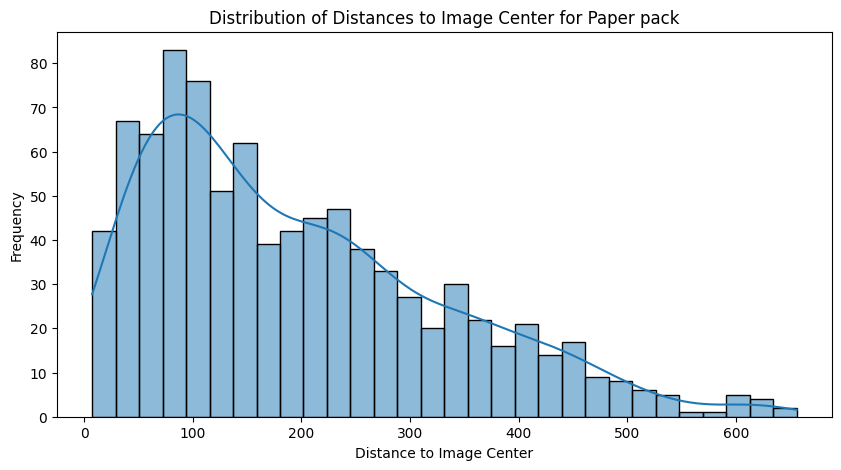

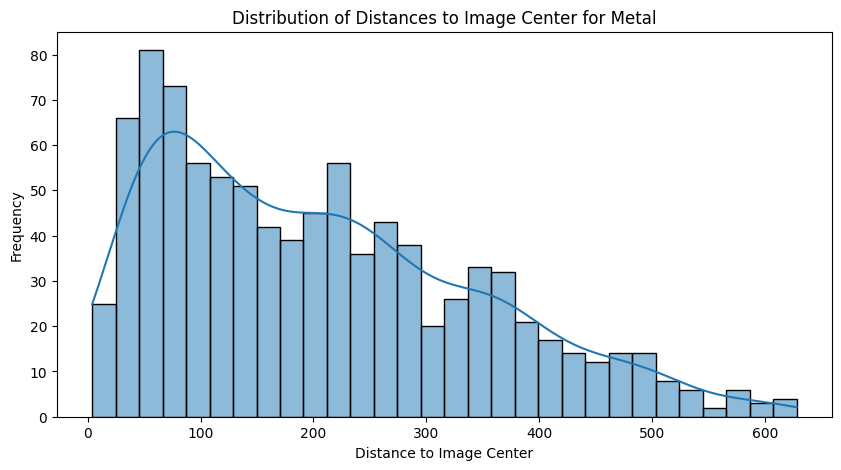

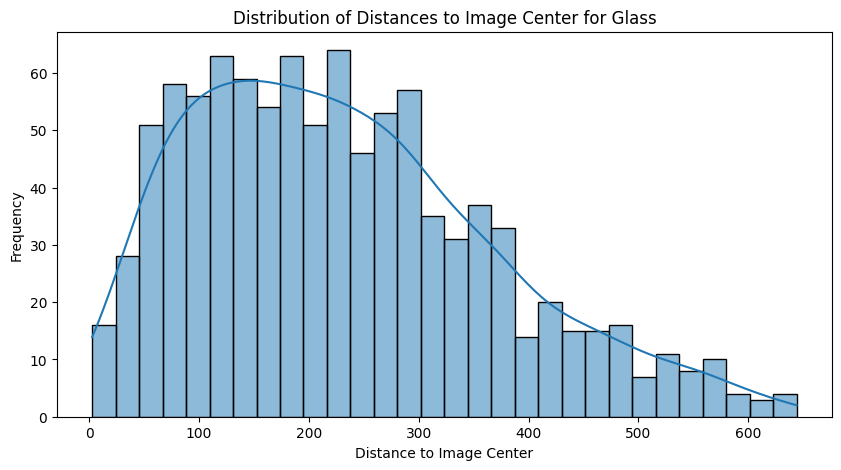

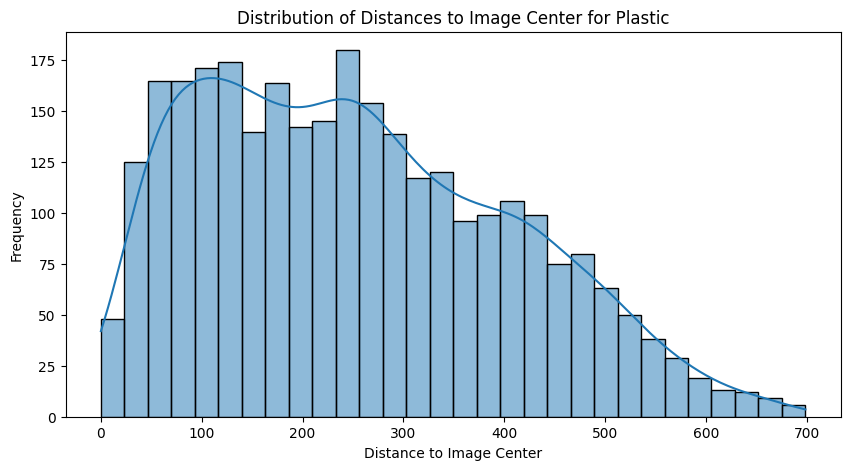

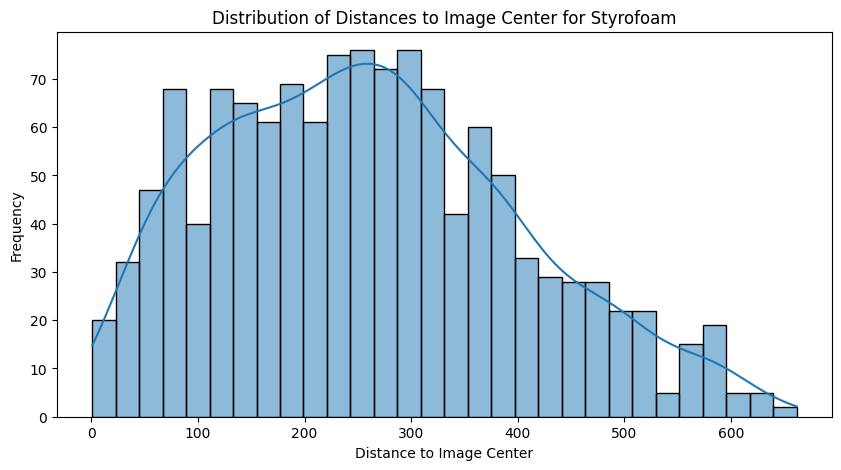

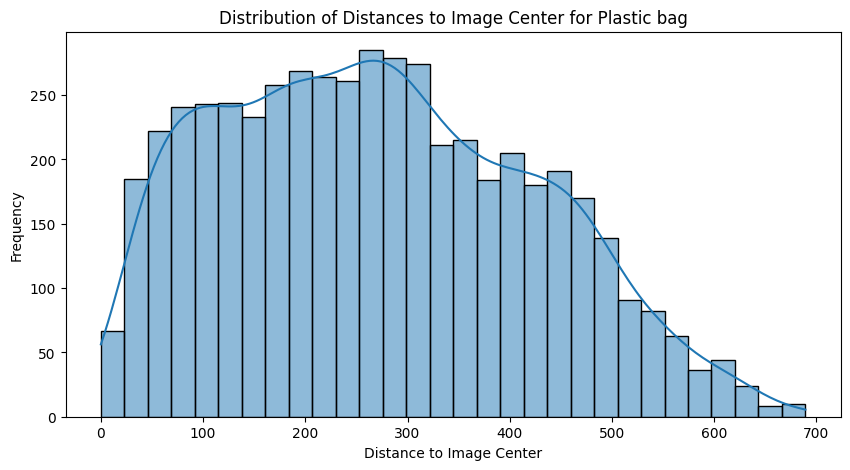

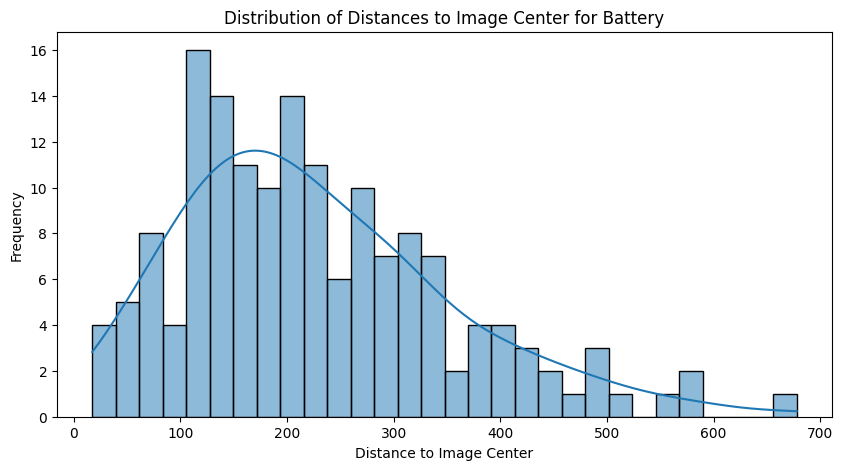

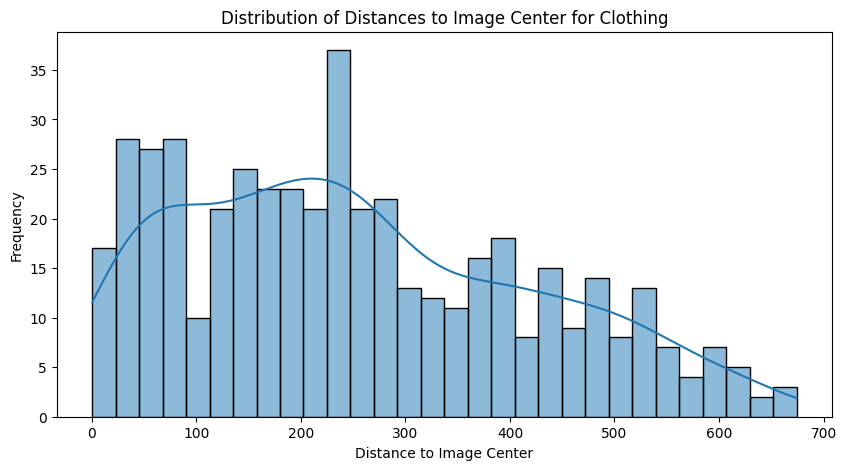

In [27]:
# 클래스별 중앙으로부터의 거리 분석
image_centers = [(image['width'] / 2, image['height'] / 2) for image in images]

for cat_id, cat_name in category_dict.items():
    cat_annotations = [annotation for annotation in annotations if annotation['category_id'] == cat_id]
    cat_distances_to_center = []

    for annotation in cat_annotations:
        image_id = annotation['image_id']
        center_x, center_y = image_centers[image_id - 1]  # COCO format은 1부터 시작
        bbox_center_x = annotation['bbox'][0] + annotation['bbox'][2] / 2
        bbox_center_y = annotation['bbox'][1] + annotation['bbox'][3] / 2
        distance_to_center = np.sqrt((bbox_center_x - center_x) ** 2 + (bbox_center_y - center_y) ** 2)
        cat_distances_to_center.append(distance_to_center)

    plt.figure(figsize=(10, 5))
    sns.histplot(cat_distances_to_center, bins=30, kde=True)
    plt.xlabel('Distance to Image Center')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Distances to Image Center for {cat_name}')
    plt.show()

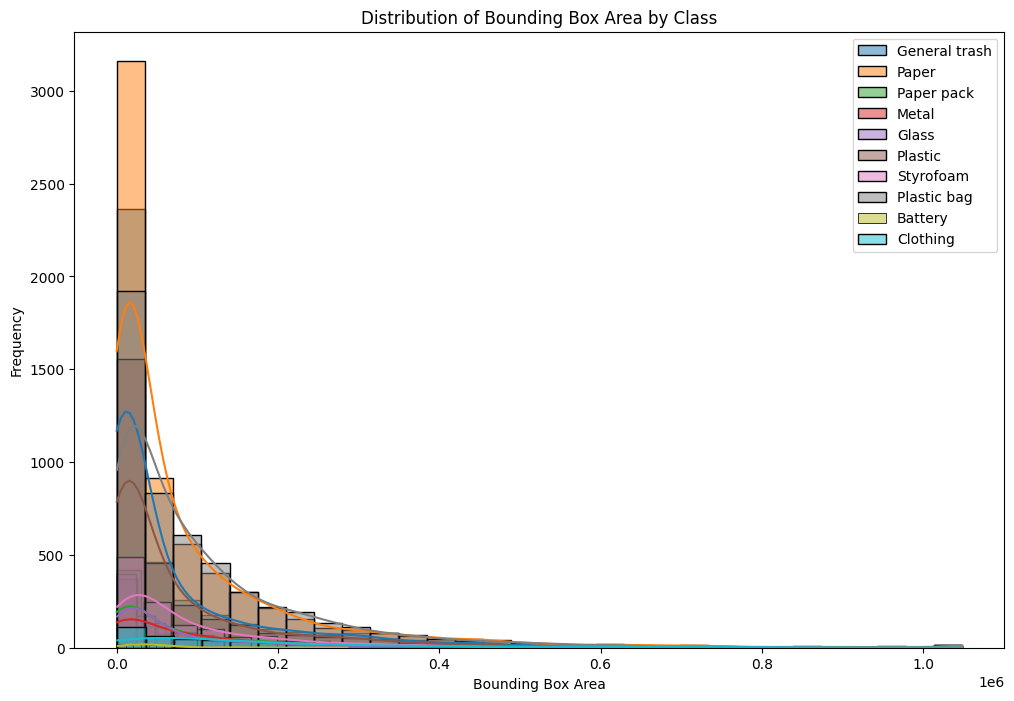

In [28]:
# 클래스별 객체의 크기 분포 시각화
plt.figure(figsize=(12, 8))
for cat_id, cat_name in category_dict.items():
    cat_bbox_areas = [annotation['area'] for annotation in annotations if annotation['category_id'] == cat_id]
    sns.histplot(cat_bbox_areas, label=cat_name, kde=True, bins=30)

plt.xlabel('Bounding Box Area')
plt.ylabel('Frequency')
plt.title('Distribution of Bounding Box Area by Class')
plt.legend()
plt.show()

In [30]:
from itertools import combinations


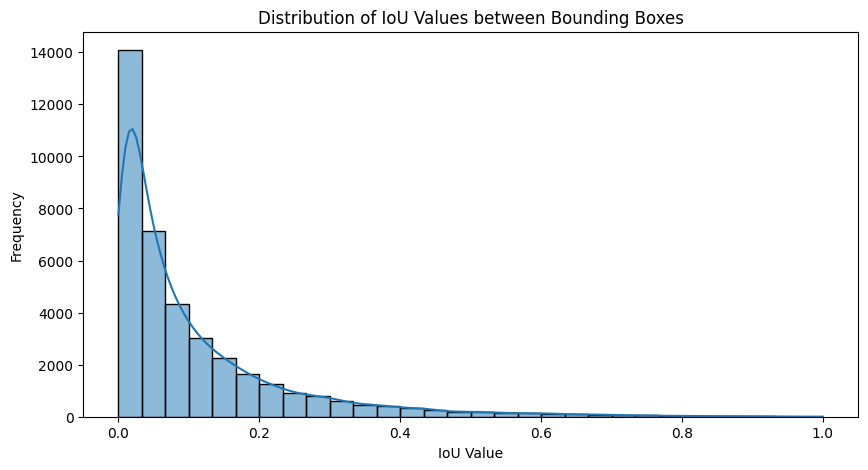

In [31]:
# 객체 간의 겹침 정도 분석 (IoU 분석)
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    x1_max, y1_max = x1 + w1, y1 + h1
    x2_max, y2_max = x2 + w2, y2 + h2

    inter_x1 = max(x1, x2)
    inter_y1 = max(y1, y2)
    inter_x2 = min(x1_max, x2_max)
    inter_y2 = min(y1_max, y2_max)

    if inter_x1 < inter_x2 and inter_y1 < inter_y2:
        inter_area = (inter_x2 - inter_x1) * (inter_y2 - inter_y1)
        box1_area = w1 * h1
        box2_area = w2 * h2
        iou = inter_area / (box1_area + box2_area - inter_area)
        return iou
    else:
        return 0

iou_values = []
for image_id in image_ids:
    image_annotations = [ann for ann in annotations if ann['image_id'] == image_id]
    for ann1, ann2 in combinations(image_annotations, 2):
        iou = calculate_iou(ann1['bbox'], ann2['bbox'])
        if iou > 0:
            iou_values.append(iou)

plt.figure(figsize=(10, 5))
sns.histplot(iou_values, bins=30, kde=True)
plt.xlabel('IoU Value')
plt.ylabel('Frequency')
plt.title('Distribution of IoU Values between Bounding Boxes')
plt.show()


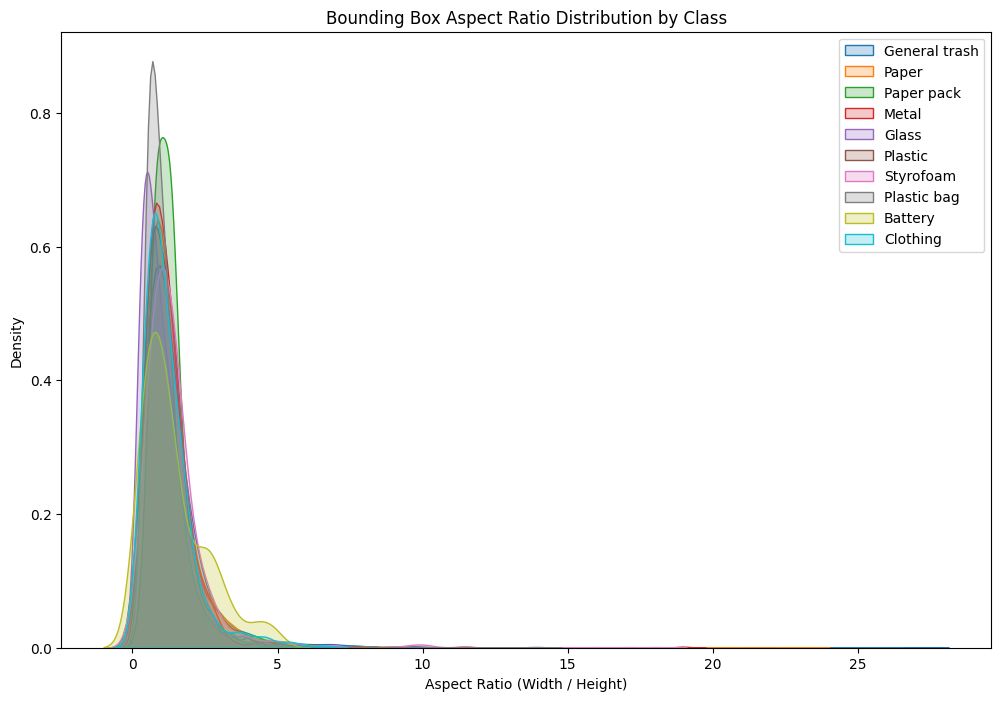

In [32]:
# 클래스별 Bounding Box 모양 분포 분석 (가로 vs 세로 비율)
plt.figure(figsize=(12, 8))
for cat_id, cat_name in category_dict.items():
    cat_bbox_ratios = [annotation['bbox'][2] / annotation['bbox'][3] if annotation['bbox'][3] > 0 else 0 
                       for annotation in annotations if annotation['category_id'] == cat_id]
    sns.kdeplot(cat_bbox_ratios, label=cat_name, fill=True)

plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Density')
plt.title('Bounding Box Aspect Ratio Distribution by Class')
plt.legend()
plt.show()

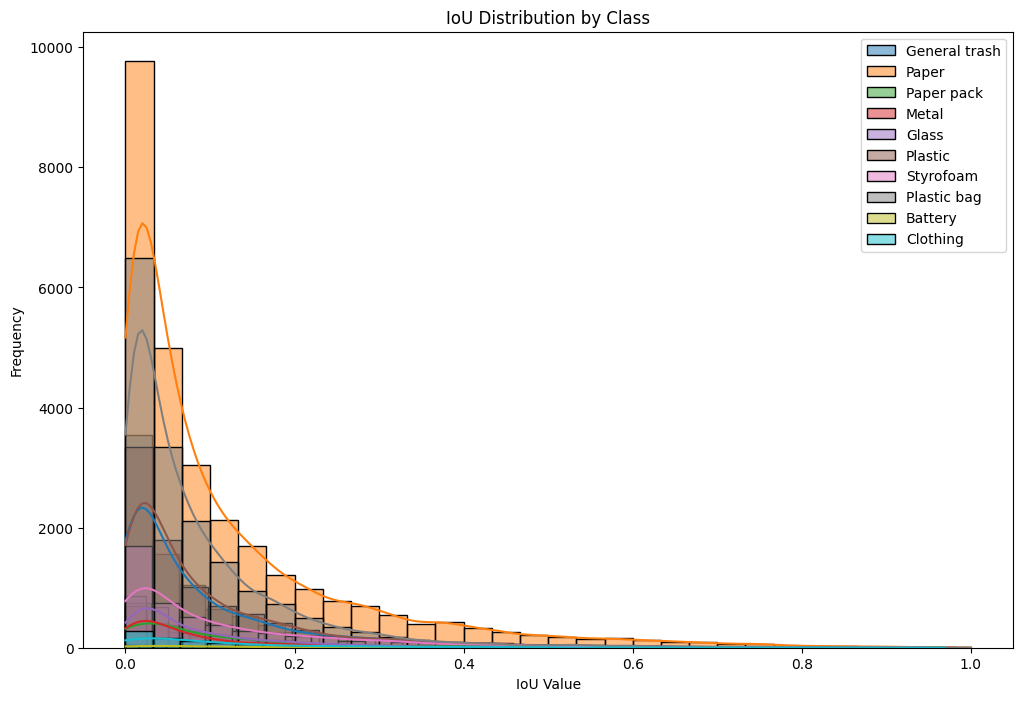

In [33]:
# 클래스별 IoU 분석
iou_values_per_class = {cat_id: [] for cat_id in category_dict.keys()}

for image_id in image_ids:
    image_annotations = [ann for ann in annotations if ann['image_id'] == image_id]
    for ann1, ann2 in combinations(image_annotations, 2):
        iou = calculate_iou(ann1['bbox'], ann2['bbox'])
        if iou > 0:
            iou_values_per_class[ann1['category_id']].append(iou)
            iou_values_per_class[ann2['category_id']].append(iou)

plt.figure(figsize=(12, 8))
for cat_id, cat_name in category_dict.items():
    sns.histplot(iou_values_per_class[cat_id], bins=30, kde=True, label=cat_name)

plt.xlabel('IoU Value')
plt.ylabel('Frequency')
plt.title('IoU Distribution by Class')
plt.legend()
plt.show()

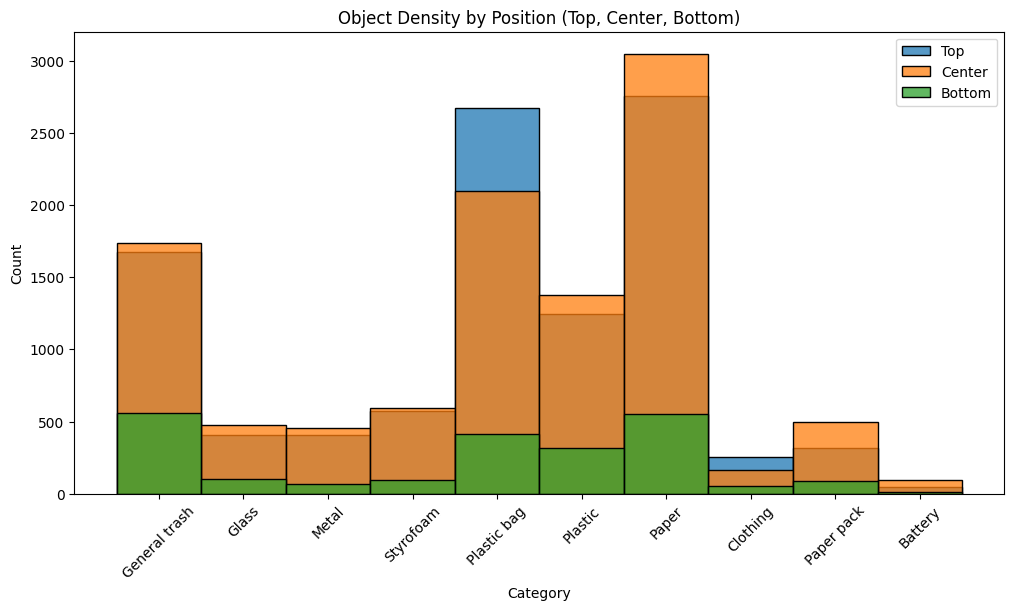

In [34]:
# Bounding Box 위치별 객체 밀도 분석
# 이미지 상단, 중앙, 하단으로 나누어 객체의 위치를 분석
positions = {'Top': [], 'Center': [], 'Bottom': []}
image_height = images[0]['height']

for annotation in annotations:
    bbox_ymin = annotation['bbox'][1]
    if bbox_ymin < image_height / 3:
        positions['Top'].append(annotation['category_id'])
    elif bbox_ymin < 2 * image_height / 3:
        positions['Center'].append(annotation['category_id'])
    else:
        positions['Bottom'].append(annotation['category_id'])

plt.figure(figsize=(12, 6))
for pos, cat_ids in positions.items():
    cat_names = [category_dict[cat_id] for cat_id in cat_ids]
    sns.histplot(cat_names, label=pos)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Object Density by Position (Top, Center, Bottom)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# 클래스 간 동시 발생 빈도 시각화

from itertools import combinations
from collections import Counter

# 이미지별로 나타나는 클래스 목록 생성
image_classes = annotations_df.groupby('image_id')['name'].apply(set)

# 모든 클래스 쌍의 동시 발생 횟수 계산
co_occurrences = Counter()

for classes in image_classes:
    for combo in combinations(classes, 2):
        co_occurrences[tuple(sorted(combo))] += 1

# 결과를 데이터프레임으로 변환
co_occurrence_df = pd.DataFrame(co_occurrences.items(), columns=['class_pair', 'count'])
co_occurrence_df.sort_values('count', ascending=False, inplace=True)

# 상위 10개 클래스 쌍 출력
print(co_occurrence_df.head(10))

# 시각화 (히트맵)
class_list = sorted(annotations_df['name'].unique())
co_occurrence_matrix = pd.DataFrame(0, index=class_list, columns=class_list)

for (class_a, class_b), count in co_occurrences.items():
    co_occurrence_matrix.loc[class_a, class_b] = count
    co_occurrence_matrix.loc[class_b, class_a] = count  # 대칭 행렬

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('클래스 간 동시 발생 히트맵')
plt.show()

In [ ]:
# 클래스별로 이미지에서 객체의 색상 히스토그램 계산
from tqdm import tqdm

# 각 클래스의 색상 히스토그램을 저장할 딕셔너리
class_color_histograms = {cls: [] for cls in annotations_df['name'].unique()}

for idx, row in tqdm(annotations_df.iterrows(), total=len(annotations_df)):
    image_path = os.path.join(image_dir, images_df[images_df['id'] == row['image_id']]['file_name'].values[0])
    with Image.open(image_path) as img:
        bbox = row['bbox']
        x, y, w, h = map(int, bbox)
        cropped_img = img.crop((x, y, x + w, y + h))
        hist = np.array(cropped_img.convert('RGB').histogram())
        class_color_histograms[row['name']].append(hist)

# 특정 클래스의 평균 색상 히스토그램 시각화
cls = 'Plastic'  # 예시 클래스
mean_hist = np.mean(class_color_histograms[cls], axis=0)

plt.figure(figsize=(12, 6))
plt.plot(mean_hist[:256], color='red', label='Red')
plt.plot(mean_hist[256:512], color='green', label='Green')
plt.plot(mean_hist[512:], color='blue', label='Blue')
plt.xlabel('픽셀 값')
plt.ylabel('빈도수')
plt.title(f'{cls} 클래스의 평균 색상 히스토그램')
plt.legend()
plt.show()